In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score

In [69]:
file_path = r"D:\Machine learning\task\data\Advertising.csv"
print(f"Loading data from: {file_path}")

data = pd.read_csv(file_path)

if 'Unnamed: 0' in data.columns:
    data.drop(['Unnamed: 0'], axis=1, inplace=True)



Loading data from: D:\Machine learning\task\data\Advertising.csv


In [70]:
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [71]:

# Scatter plot function
def scatter_plot(feature, target):
    plt.figure(figsize=(16, 8))
    plt.scatter(
        data[feature],
        data[target],
        c='black'
    )
    plt.xlabel("Money spent on {} ads ($)".format(feature))
    plt.ylabel("Sales ($k)")
    plt.show()


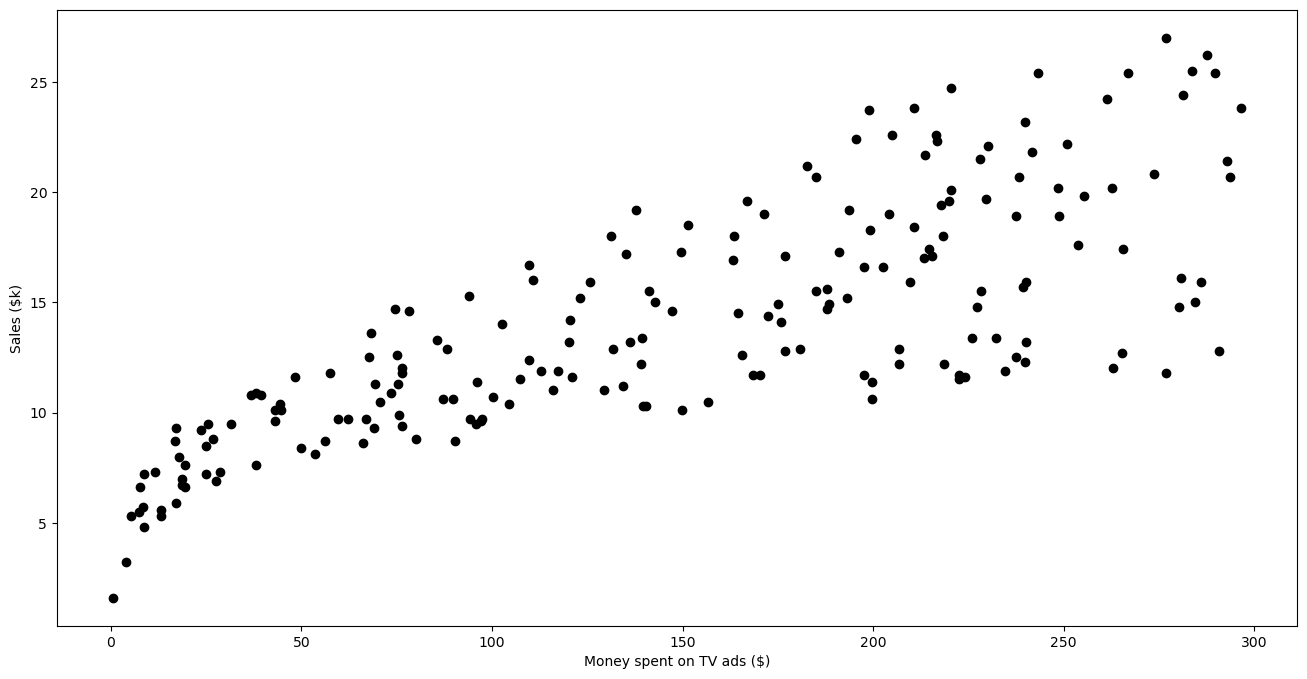

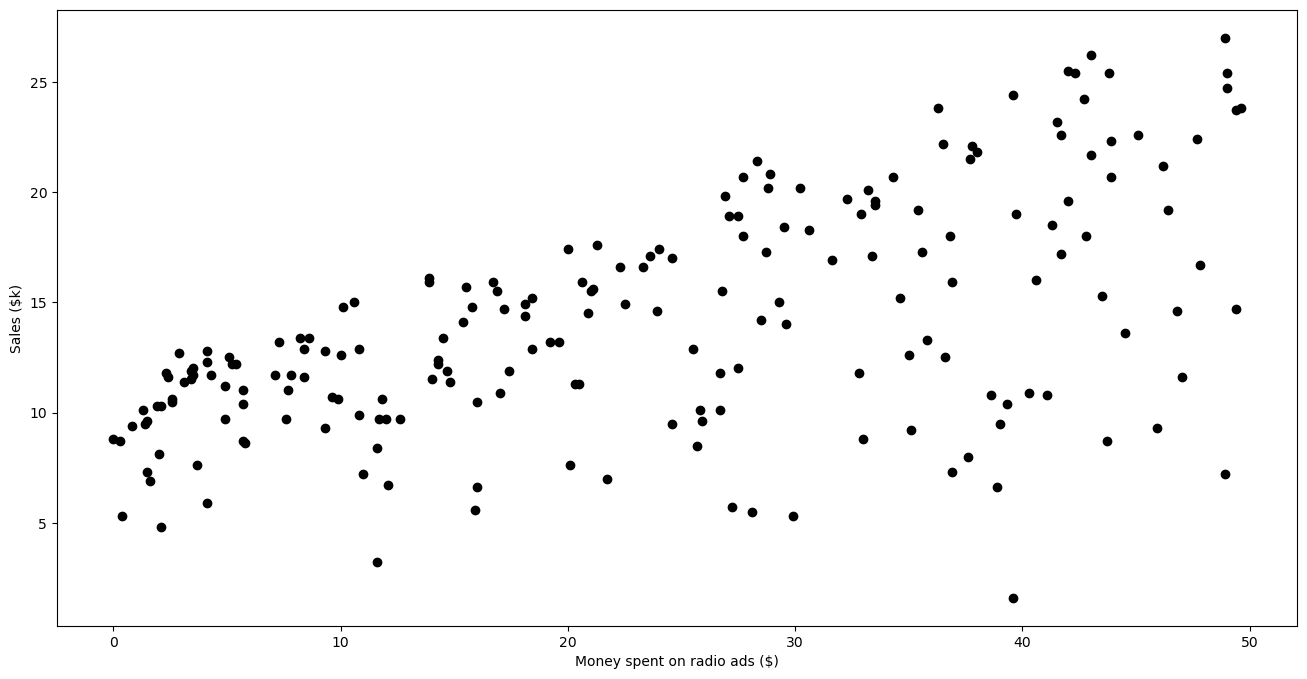

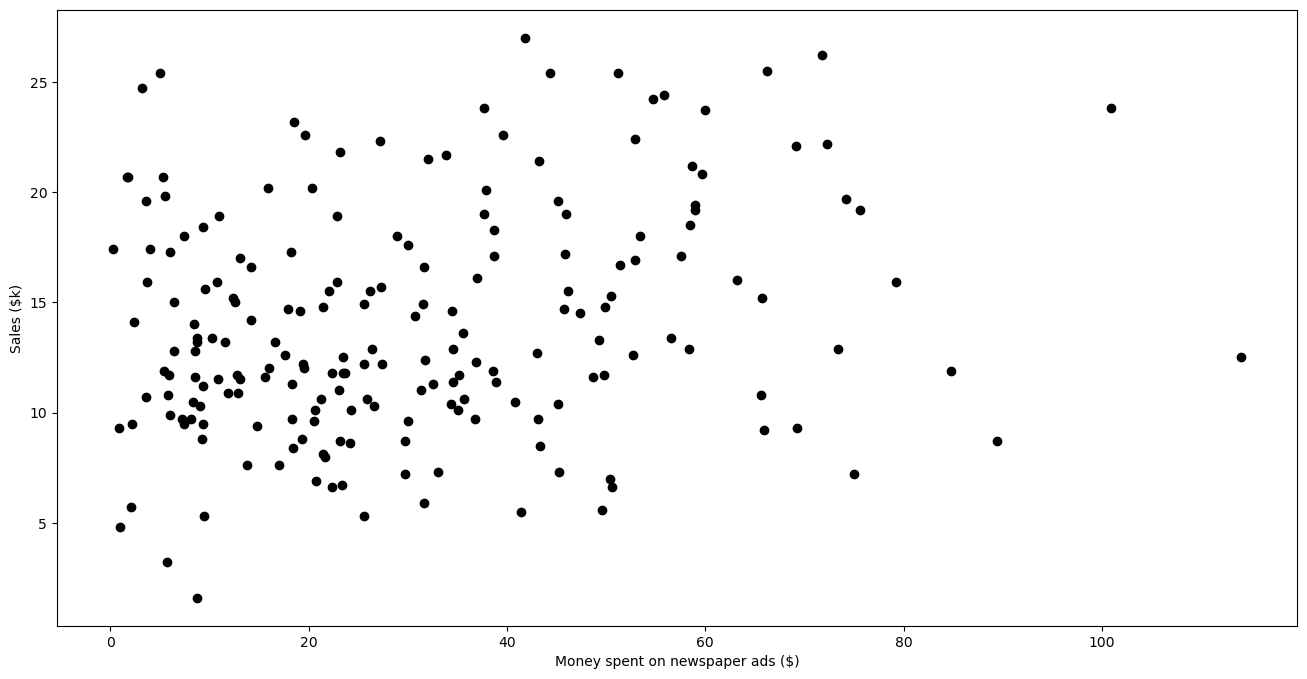

In [72]:

# Scatter plots for each feature
scatter_plot('TV', 'sales')
scatter_plot('radio', 'sales')
scatter_plot('newspaper', 'sales')


In [73]:
# Prepare data for regression
Xs = data.drop(['sales'], axis=1)
y = data['sales']


In [74]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.2, random_state=42)


In [75]:

# Linear Regression for comparison
lin_reg = LinearRegression()
MSEs = cross_val_score(lin_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
mean_MSE = np.mean(MSEs)
print("Linear Regression Mean MSE:", mean_MSE)

Linear Regression Mean MSE: -2.943392602590043


In [76]:

# Ridge Regression
alpha = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]
ridge = Ridge()
parameters = {'alpha': alpha}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             scoring='neg_mean_squared_error')

In [77]:
print("Ridge Best Params:", ridge_regressor.best_params_)
print("Ridge Best Score:", ridge_regressor.best_score_)

Ridge Best Params: {'alpha': 1e-15}
Ridge Best Score: -2.943392602590042


In [78]:

# Fit Ridge model to the training data
ridge_best = Ridge(alpha=ridge_regressor.best_params_['alpha'])
ridge_best.fit(X_train, y_train)
ridge_train_pred = ridge_best.predict(X_train)
ridge_test_pred = ridge_best.predict(X_test)


In [79]:
# Calculate and print R² for Ridge
ridge_train_r2 = r2_score(y_train, ridge_train_pred)
ridge_test_r2 = r2_score(y_test, ridge_test_pred)
print(f'Ridge Regression R² (Train): {ridge_train_r2:.2f}')
print(f'Ridge Regression R² (Test): {ridge_test_r2:.2f}')

Ridge Regression R² (Train): 0.90
Ridge Regression R² (Test): 0.90


In [80]:
# Lasso Regression
lasso = Lasso()
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

c:\Users\Hp\miniconda3\envs\machine_learning\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.480e+02, tolerance: 3.381e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\Hp\miniconda3\envs\machine_learning\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.699e+02, tolerance: 3.126e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\Hp\miniconda3\envs\machine_learning\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             scoring='neg_mean_squared_error')

In [81]:
print("Lasso Best Params:", lasso_regressor.best_params_)
print("Lasso Best Score:", lasso_regressor.best_score_)

Lasso Best Params: {'alpha': 1}
Lasso Best Score: -2.919547471425601


In [82]:
# Fit Lasso model to the training data
lasso_best = Lasso(alpha=lasso_regressor.best_params_['alpha'])
lasso_best.fit(X_train, y_train)
lasso_train_pred = lasso_best.predict(X_train)
lasso_test_pred = lasso_best.predict(X_test)

In [83]:

# Calculate and print R² for Lasso
lasso_train_r2 = r2_score(y_train, lasso_train_pred)
lasso_test_r2 = r2_score(y_test, lasso_test_pred)
print(f'Lasso Regression R² (Train): {lasso_train_r2:.2f}')
print(f'Lasso Regression R² (Test): {lasso_test_r2:.2f}')

Lasso Regression R² (Train): 0.90
Lasso Regression R² (Test): 0.90


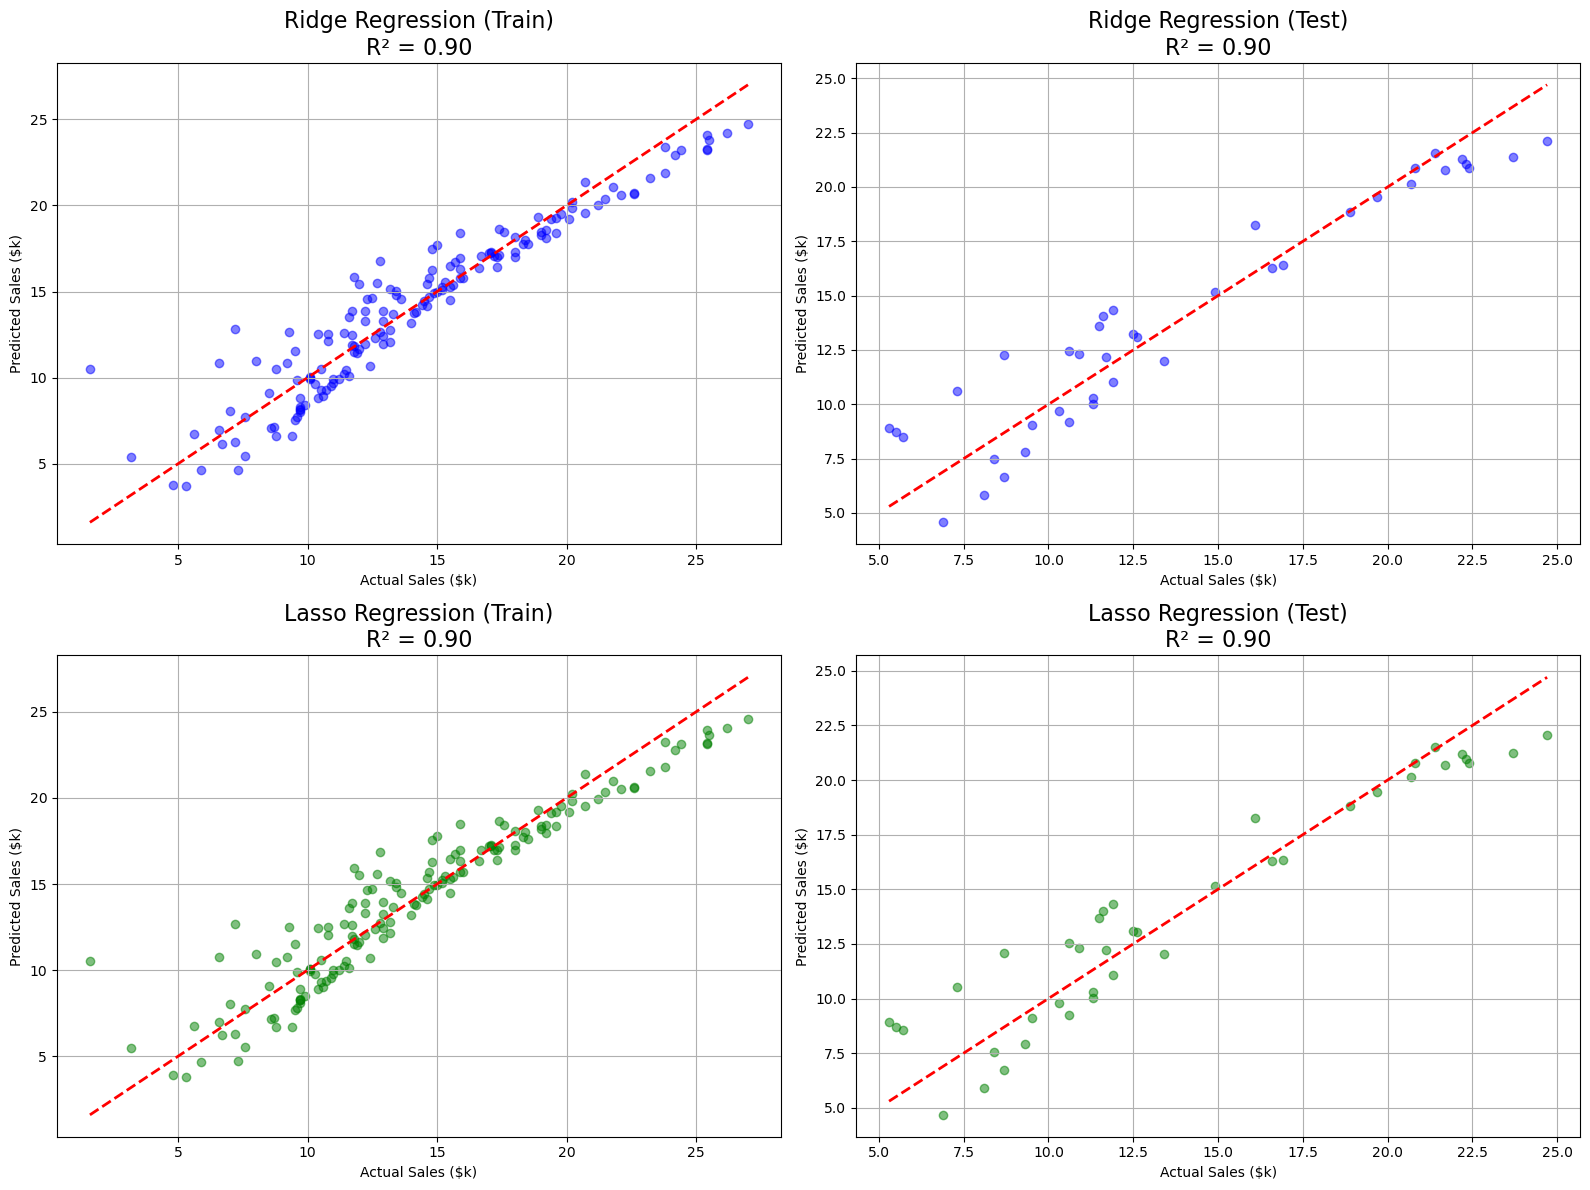

In [84]:
# Plotting Ridge predictions
plt.figure(figsize=(16, 12))

# Ridge Regression Training Plot
plt.subplot(2, 2, 1)
plt.scatter(y_train, ridge_train_pred, color='blue', alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)  # Ideal line
plt.title(f'Ridge Regression (Train)\nR² = {ridge_train_r2:.2f}', fontsize=16)
plt.xlabel('Actual Sales ($k)')
plt.ylabel('Predicted Sales ($k)')
plt.grid()

# Ridge Regression Testing Plot
plt.subplot(2, 2, 2)
plt.scatter(y_test, ridge_test_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Ideal line
plt.title(f'Ridge Regression (Test)\nR² = {ridge_test_r2:.2f}', fontsize=16)
plt.xlabel('Actual Sales ($k)')
plt.ylabel('Predicted Sales ($k)')
plt.grid()

# Lasso Regression Training Plot
plt.subplot(2, 2, 3)
plt.scatter(y_train, lasso_train_pred, color='green', alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)  # Ideal line
plt.title(f'Lasso Regression (Train)\nR² = {lasso_train_r2:.2f}', fontsize=16)
plt.xlabel('Actual Sales ($k)')
plt.ylabel('Predicted Sales ($k)')
plt.grid()

# Lasso Regression Testing Plot
plt.subplot(2, 2, 4)
plt.scatter(y_test, lasso_test_pred, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Ideal line
plt.title(f'Lasso Regression (Test)\nR² = {lasso_test_r2:.2f}', fontsize=16)
plt.xlabel('Actual Sales ($k)')
plt.ylabel('Predicted Sales ($k)')
plt.grid()

plt.tight_layout()
plt.show()

In [85]:
# import pandas as pd

# # Change input_data to a DataFrame
# def predict(input_tv, input_radio, input_newspaper):
#     input_data = pd.DataFrame({
#         'TV': [input_tv],
#         'radio': [input_radio],
#         'newspaper': [input_newspaper]
#     })
    
#     ridge_pred = ridge_best.predict(input_data)[0]
#     lasso_pred = lasso_best.predict(input_data)[0]
    
#     return f"Ridge Prediction: ${ridge_pred:.2f}k, Lasso Prediction: ${lasso_pred:.2f}k"


In [86]:
import gradio as gr

# Function to make predictions using the fitted models
def predict(input_tv, input_radio, input_newspaper):
    input_data = np.array([[input_tv, input_radio, input_newspaper]])
    
    # Make predictions
    ridge_pred = ridge_best.predict(input_data)[0]  # Get the scalar value directly
    lasso_pred = lasso_best.predict(input_data)[0]  # Get the scalar value directly
    
    # Format the output
    return f"Ridge Prediction: ${ridge_pred:.2f}k, Lasso Prediction: ${lasso_pred:.2f}k"

# Create Gradio interface
iface = gr.Interface(
    fn=predict,
    inputs=[
        gr.Number(label="TV Advertising ($)"),
        gr.Number(label="Radio Advertising ($)"),
        gr.Number(label="Newspaper Advertising ($)")
    ],
    outputs="text",  # Output type to show formatted predictions
    title="Advertising Sales Prediction",
    description="Enter the amount spent on TV, Radio, and Newspaper ads to predict the sales using Ridge and Lasso regression."
)

# Launch the interface
iface.launch()

Running on local URL:  http://127.0.0.1:7872

To create a public link, set `share=True` in `launch()`.


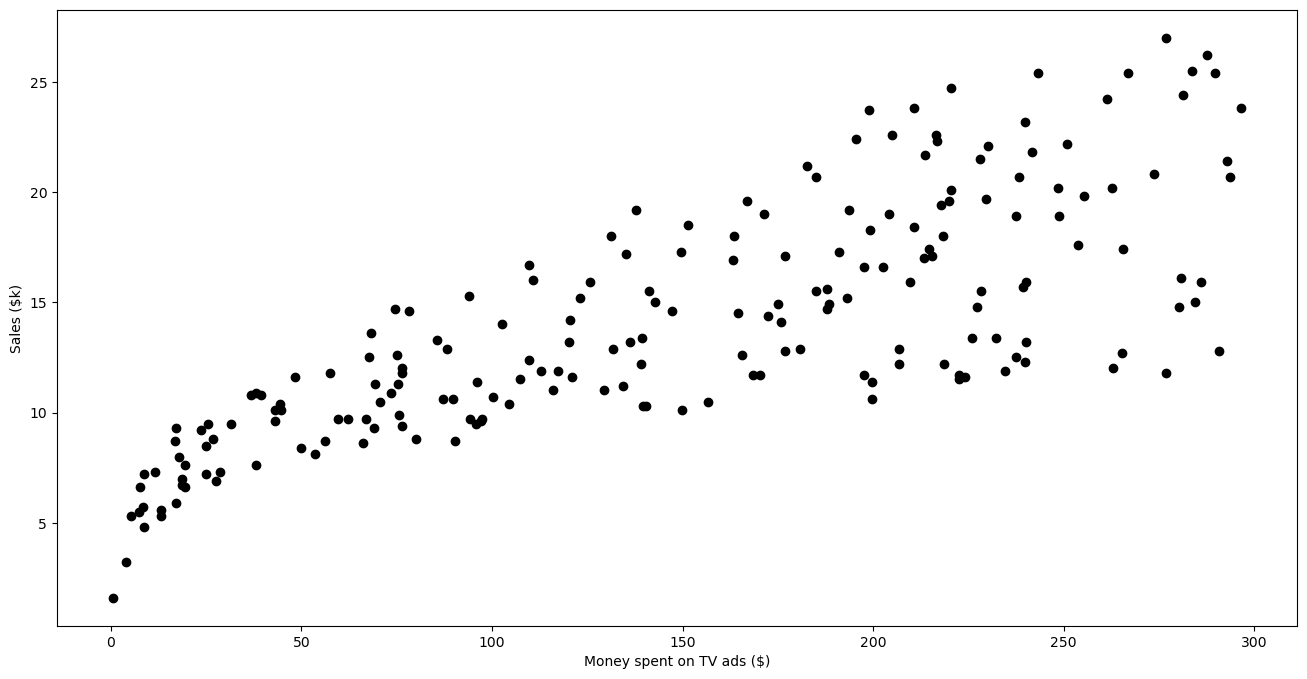

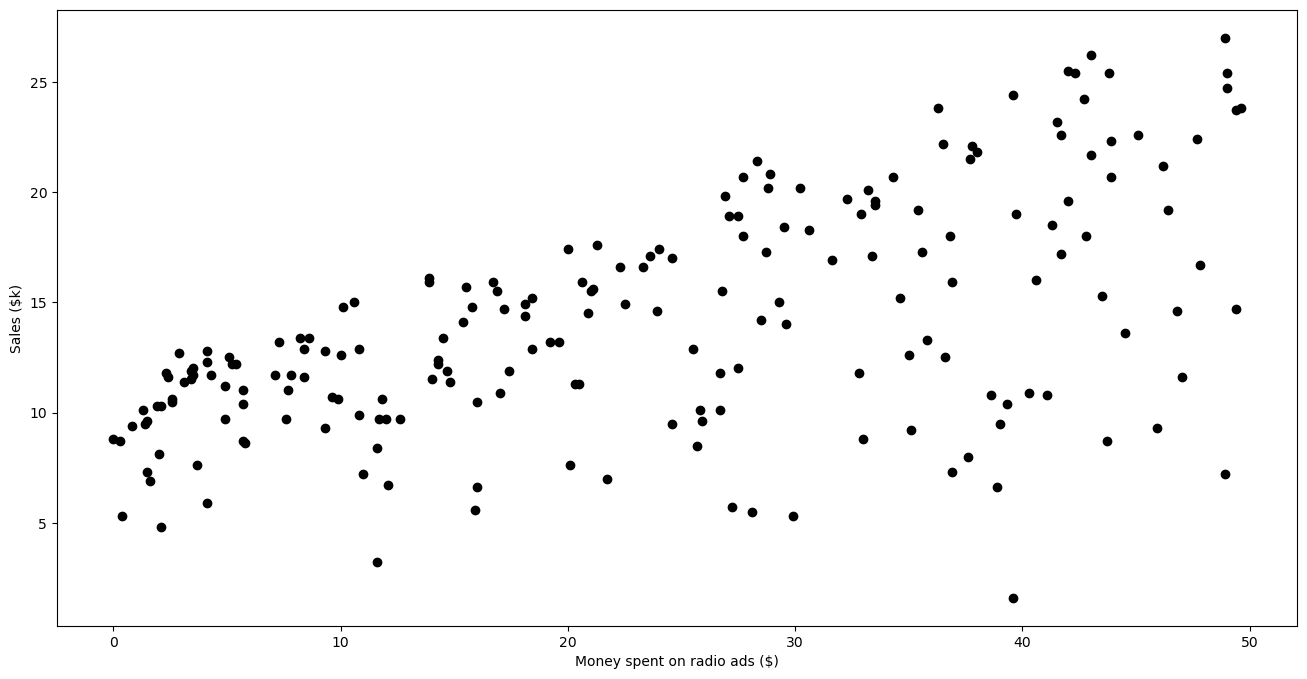

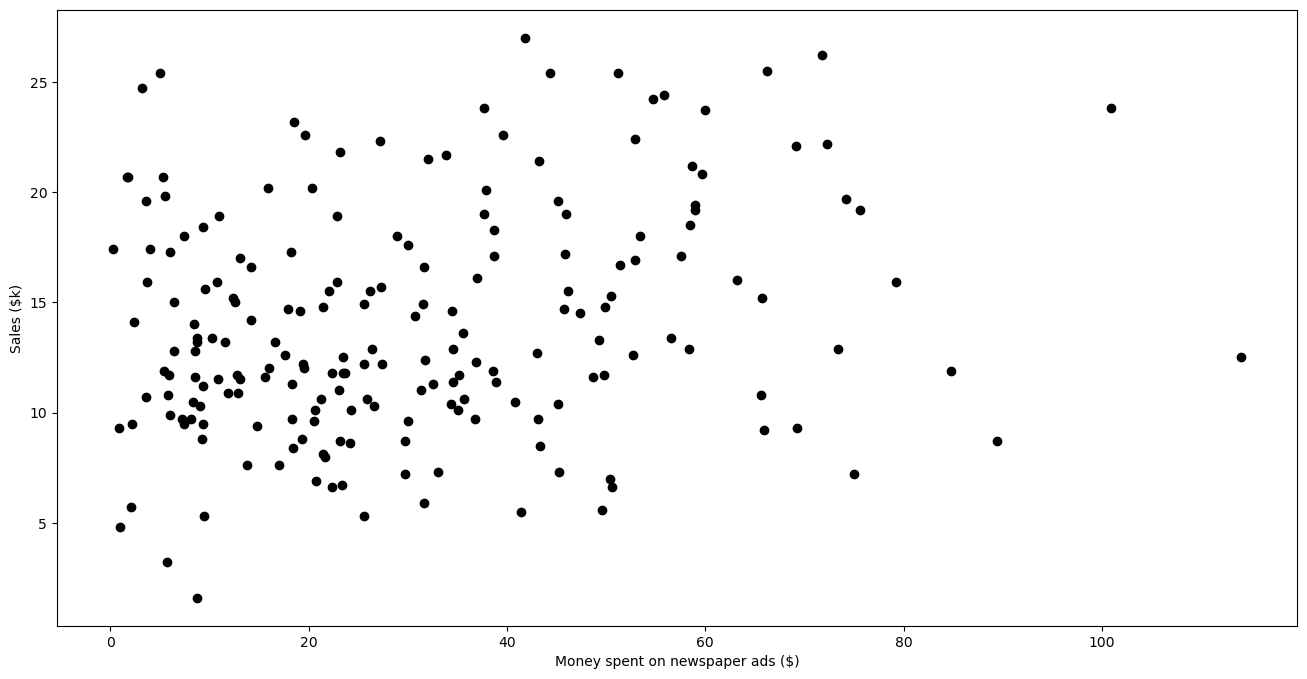

Linear Regression Mean MSE: -2.943392602590043
Ridge Best Params: {'alpha': 1e-15}
Ridge Best Score: -2.943392602590042
Ridge Regression R² (Train): 0.90
Ridge Regression R² (Test): 0.90


c:\Users\Hp\miniconda3\envs\machine_learning\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.480e+02, tolerance: 3.381e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\Hp\miniconda3\envs\machine_learning\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.699e+02, tolerance: 3.126e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\Hp\miniconda3\envs\machine_learning\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

Lasso Best Params: {'alpha': 1}
Lasso Best Score: -2.919547471425601
Lasso Regression R² (Train): 0.90
Lasso Regression R² (Test): 0.90


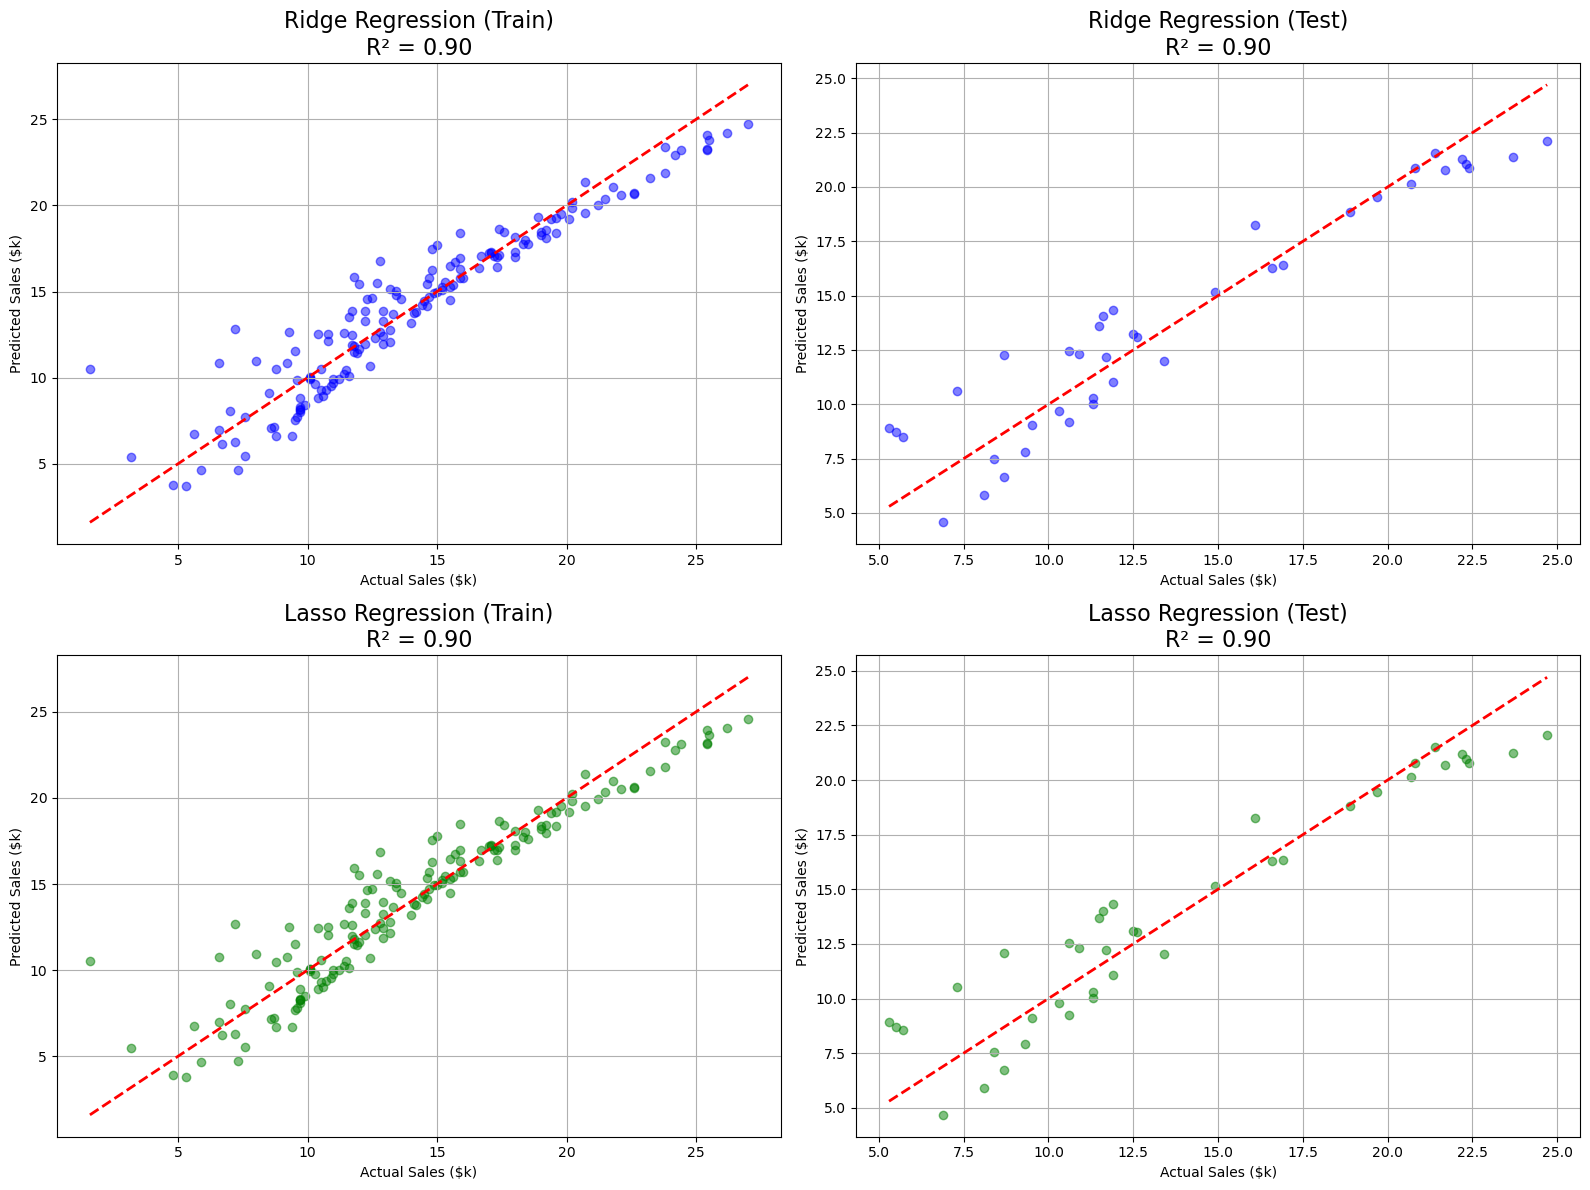

c:\Users\Hp\miniconda3\envs\machine_learning\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
c:\Users\Hp\miniconda3\envs\machine_learning\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score

# Load the data
DATAPATH = r'D:\Machine learning\task\data\Advertising.csv'
data = pd.read_csv(DATAPATH)

# Check if 'Unnamed: 0' column exists before dropping
if 'Unnamed: 0' in data.columns:
    data.drop(['Unnamed: 0'], axis=1, inplace=True)
# ... (rest of the code)

# Scatter plot function
def scatter_plot(feature, target):
    plt.figure(figsize=(16, 8))
    plt.scatter(
        data[feature],
        data[target],
        c='black'
    )
    plt.xlabel("Money spent on {} ads ($)".format(feature))
    plt.ylabel("Sales ($k)")
    plt.show()

# Scatter plots for each feature
scatter_plot('TV', 'sales')
scatter_plot('radio', 'sales')
scatter_plot('newspaper', 'sales')

# Prepare data for regression
Xs = data.drop(['sales'], axis=1)
y = data['sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.2, random_state=42)

# Linear Regression for comparison
lin_reg = LinearRegression()
MSEs = cross_val_score(lin_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
mean_MSE = np.mean(MSEs)
print("Linear Regression Mean MSE:", mean_MSE)

# Ridge Regression
alpha = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]
ridge = Ridge()
parameters = {'alpha': alpha}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train, y_train)

print("Ridge Best Params:", ridge_regressor.best_params_)
print("Ridge Best Score:", ridge_regressor.best_score_)

# Fit Ridge model to the training data
ridge_best = Ridge(alpha=ridge_regressor.best_params_['alpha'])
ridge_best.fit(X_train, y_train)
ridge_train_pred = ridge_best.predict(X_train)
ridge_test_pred = ridge_best.predict(X_test)

# Calculate and print R² for Ridge
ridge_train_r2 = r2_score(y_train, ridge_train_pred)
ridge_test_r2 = r2_score(y_test, ridge_test_pred)
print(f'Ridge Regression R² (Train): {ridge_train_r2:.2f}')
print(f'Ridge Regression R² (Test): {ridge_test_r2:.2f}')

# Lasso Regression
lasso = Lasso()
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

print("Lasso Best Params:", lasso_regressor.best_params_)
print("Lasso Best Score:", lasso_regressor.best_score_)

# Fit Lasso model to the training data
lasso_best = Lasso(alpha=lasso_regressor.best_params_['alpha'])
lasso_best.fit(X_train, y_train)
lasso_train_pred = lasso_best.predict(X_train)
lasso_test_pred = lasso_best.predict(X_test)

# Calculate and print R² for Lasso
lasso_train_r2 = r2_score(y_train, lasso_train_pred)
lasso_test_r2 = r2_score(y_test, lasso_test_pred)
print(f'Lasso Regression R² (Train): {lasso_train_r2:.2f}')
print(f'Lasso Regression R² (Test): {lasso_test_r2:.2f}')

# Plotting Ridge predictions
plt.figure(figsize=(16, 12))

# Ridge Regression Training Plot
plt.subplot(2, 2, 1)
plt.scatter(y_train, ridge_train_pred, color='blue', alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)  # Ideal line
plt.title(f'Ridge Regression (Train)\nR² = {ridge_train_r2:.2f}', fontsize=16)
plt.xlabel('Actual Sales ($k)')
plt.ylabel('Predicted Sales ($k)')
plt.grid()

# Ridge Regression Testing Plot
plt.subplot(2, 2, 2)
plt.scatter(y_test, ridge_test_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Ideal line
plt.title(f'Ridge Regression (Test)\nR² = {ridge_test_r2:.2f}', fontsize=16)
plt.xlabel('Actual Sales ($k)')
plt.ylabel('Predicted Sales ($k)')
plt.grid()

# Lasso Regression Training Plot
plt.subplot(2, 2, 3)
plt.scatter(y_train, lasso_train_pred, color='green', alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)  # Ideal line
plt.title(f'Lasso Regression (Train)\nR² = {lasso_train_r2:.2f}', fontsize=16)
plt.xlabel('Actual Sales ($k)')
plt.ylabel('Predicted Sales ($k)')
plt.grid()

# Lasso Regression Testing Plot
plt.subplot(2, 2, 4)
plt.scatter(y_test, lasso_test_pred, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Ideal line
plt.title(f'Lasso Regression (Test)\nR² = {lasso_test_r2:.2f}', fontsize=16)
plt.xlabel('Actual Sales ($k)')
plt.ylabel('Predicted Sales ($k)')
plt.grid()

plt.tight_layout()
plt.show()